# Master's Thesis Experiments Report

In [77]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scripts.utils import load_latency_data, load_packet_data, clean_latency_data

In [78]:
# constants
LAST_FRAME = 526
FIG_DIR = './figures/{}'

## 1.   Pipeline Latency
The data was replayed at 8 Mbps.
For each frame f, we measure the timedelta between the last emitted LiDAR data packet and
the last incoming Palicus data packet containing data associated with f.
We exclude the first and the last frame to ensure that we only consider the latency of full frames.

In [79]:
fig_dir = FIG_DIR.format('latency')
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

In [80]:
# Load the data
df_conversion = load_latency_data(max_frame=LAST_FRAME - 1)
df_roi = load_latency_data(pipeline='roi', max_frame=LAST_FRAME - 1)
df_dm1 = load_latency_data(pipeline='dm1', max_frame=LAST_FRAME - 1)
df_dm2 = load_latency_data(pipeline='dm2', max_frame=LAST_FRAME - 1)
df_bev = load_latency_data(pipeline='bev', max_frame=LAST_FRAME - 1)
df_max = load_latency_data(pipeline='max', max_frame=LAST_FRAME - 1)

In [81]:
# tabular representation
l = 'latency [ms]'
# only consider frames if their latency is within (mean - 2*sd, mean + 2 * sd)
df_conv_clean = clean_latency_data(df_conversion)
df_roi_clean = clean_latency_data(df_roi)
df_dm1_clean = clean_latency_data(df_dm1)
df_dm2_clean = clean_latency_data(df_dm2)
df_bev_clean = clean_latency_data(df_bev)
df_max_clean = clean_latency_data(df_max)

results = [['min', df_conv_clean.min()[l], df_roi_clean.min()[l], df_dm1_clean.min()[l], df_dm2_clean.min()[l], df_bev_clean.min()[l], df_max_clean.min()[l]],
           ['mean', df_conv_clean.mean()[l], df_roi_clean.mean()[l], df_dm1_clean.mean()[l], df_dm2_clean.mean()[l], df_bev_clean.mean()[l], df_max_clean.mean()[l]],
           ['median', df_conv_clean.median()[l], df_roi_clean.median()[l], df_dm1_clean.median()[l], df_dm2_clean.median()[l], df_bev_clean.median()[l], df_max_clean.median()[l]],
           ['max', df_conv_clean.max()[l], df_roi_clean.max()[l], df_dm1_clean.max()[l], df_dm2_clean.max()[l], df_bev_clean.max()[l], df_max_clean.max()[l]]
           ]

df_latency_results = pd.DataFrame(results, columns=['', 'CONV', 'RoI', 'DM (1)', 'DM (2)', 'BEV', 'MAX'])
print(df_latency_results)


               CONV       RoI    DM (1)    DM (2)        BEV         MAX
0     min  0.180000  0.174000  0.178000  0.176000  46.422000  141.214000
1    mean  0.296084  0.292099  0.295198  0.301033  47.394837  234.022512
2  median  0.293000  0.292000  0.299000  0.304500  47.702000  234.813000
3     max  0.577000  0.529000  0.515000  0.513000  48.073000  236.362000


C:\Users\sophi\AppData\Local\Temp\ipykernel_10688\3051513321.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df_conversion['latency [ms]'].to_numpy(), positions=[2], widths=[1],
C:\Users\sophi\AppData\Local\Temp\ipykernel_10688\3051513321.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df_roi['latency [ms]'].to_numpy(), positions=[4], widths=[1],
C:\Users\sophi\AppData\Local\Temp\ipykernel_10688\3051513321.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df_dm1['latency [ms]'].to_numpy(), positions=[6], widths=[1],
C:\Users\sophi\AppData\Local\Temp\ipykernel_10688\3051513321

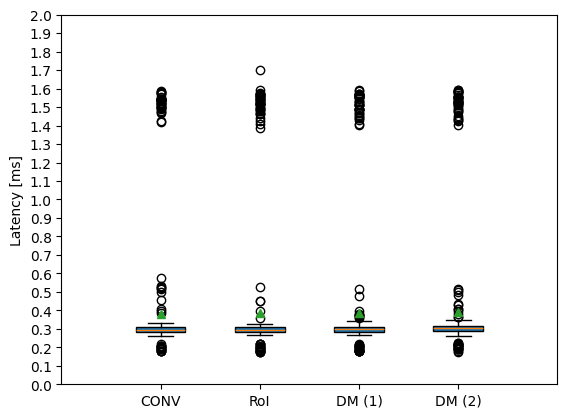

In [82]:
# computation time: conversion vs. RoI vs. DepthMap
fig, ax = plt.subplots()
ax.boxplot(df_conversion['latency [ms]'].to_numpy(), positions=[2], widths=[1],
           patch_artist=True, showmeans=True, showfliers=True, labels=['CONV'])
ax.boxplot(df_roi['latency [ms]'].to_numpy(), positions=[4], widths=[1],
           patch_artist=True, showmeans=True, showfliers=True, labels=['RoI'])
ax.boxplot(df_dm1['latency [ms]'].to_numpy(), positions=[6], widths=[1],
           patch_artist=True, showmeans=True, showfliers=True, labels=['DM (1)'])
ax.boxplot(df_dm2['latency [ms]'].to_numpy(), positions=[8], widths=[1],
           patch_artist=True, showmeans=True, showfliers=True, labels=['DM (2)'])
ax.set(xlim=(0, 10))
ax.set(ylim=(0, 2), yticks=[i / 10 for i in range(21)], ylabel='Latency [ms]')
plt.show()
fig.savefig(os.path.join(fig_dir, 'conv_roi_dm.png'))

C:\Users\sophi\AppData\Local\Temp\ipykernel_10688\2688206651.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df_conversion['CONV'].to_numpy(), positions=[2], widths=[1],
C:\Users\sophi\AppData\Local\Temp\ipykernel_10688\2688206651.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df_roi['RoI'].to_numpy(), positions=[4], widths=[1],
C:\Users\sophi\AppData\Local\Temp\ipykernel_10688\2688206651.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df_dm1['DM (1)'].to_numpy(), positions=[6], widths=[1],
C:\Users\sophi\AppData\Local\Temp\ipykernel_10688\2688206651.py:15: MatplotlibDep

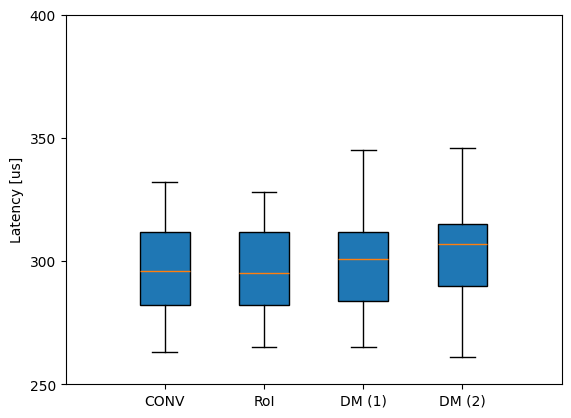

In [83]:
# computation time: conversion vs. RoI vs. DepthMap
df_conversion['CONV'] = df_conversion['latency [ms]'] * 1000
df_roi['RoI'] = df_roi['latency [ms]'] * 1000
df_dm1['DM (1)'] = df_dm1['latency [ms]'] * 1000
df_dm2['DM (2)'] = df_dm2['latency [ms]'] * 1000


fig, ax = plt.subplots()
ax.boxplot(df_conversion['CONV'].to_numpy(), positions=[2], widths=[1],
           patch_artist=True, showmeans=False, showfliers=False, labels=['CONV'])
ax.boxplot(df_roi['RoI'].to_numpy(), positions=[4], widths=[1],
           patch_artist=True, showmeans=False, showfliers=False, labels=['RoI'])
ax.boxplot(df_dm1['DM (1)'].to_numpy(), positions=[6], widths=[1],
           patch_artist=True, showmeans=False, showfliers=False, labels=['DM (1)'])
ax.boxplot(df_dm2['DM (2)'].to_numpy(), positions=[8], widths=[1],
           patch_artist=True, showmeans=False, showfliers=False, labels=['DM (2)'])
ax.set(xlim=(0, 10))
ax.set(ylim=(250, 400), yticks=[250 + i * 50 for i in range(4)], ylabel='Latency [us]')
plt.show()
fig.savefig(os.path.join(fig_dir, 'conv_roi_dm_no_outliers.png'))

C:\Users\sophi\AppData\Local\Temp\ipykernel_10688\1225436860.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df_bev['latency [ms]'].to_numpy(), positions=[2], widths=[1],
C:\Users\sophi\AppData\Local\Temp\ipykernel_10688\1225436860.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df_max['latency [ms]'].to_numpy(), positions=[4], widths=[1],


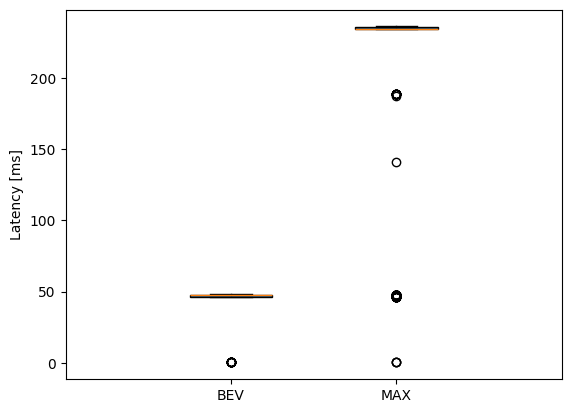

In [84]:
# computation time: BEV vs. MAX
fig, ax = plt.subplots()
ax.boxplot(df_bev['latency [ms]'].to_numpy(), positions=[2], widths=[1],
           patch_artist=True, showmeans=False, showfliers=True, labels=['BEV'])
ax.boxplot(df_max['latency [ms]'].to_numpy(), positions=[4], widths=[1],
           patch_artist=True, showmeans=False, showfliers=True, labels=['MAX'])
ax.set(xlim=(0, 6))
ax.set(ylabel='Latency [ms]')
plt.show()
fig.savefig(os.path.join(fig_dir, 'bev_max.png'))

### Latency Impact of PEs

C:\Users\sophi\AppData\Local\Temp\ipykernel_10688\2702650213.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df_compare_fpe['diff'].to_numpy(), positions=[2], widths=[1],
C:\Users\sophi\AppData\Local\Temp\ipykernel_10688\2702650213.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df_compare_arpe['diff'].to_numpy(), positions=[4], widths=[1],


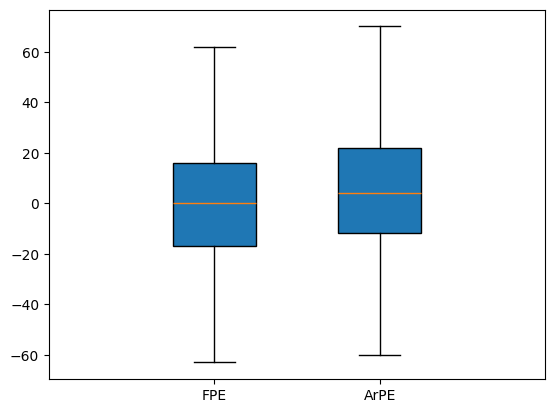

In [85]:
# FPE
df_compare_fpe = pd.concat([df_conversion.loc[:, 'CONV'],
                        df_roi.loc[:, 'RoI']], axis=1)
df_compare_fpe['diff'] = df_compare_fpe['RoI'] - df_compare_fpe['CONV']

# ArPE
df_compare_1 = pd.concat([df_roi.loc[:, 'RoI'],
                        df_dm1.loc[:, 'DM (1)']], axis=1)
df_compare_1['diff'] = df_compare_1['DM (1)'] - df_compare_1['RoI']
df_compare_1 = df_compare_1.loc[:, 'diff']

df_compare_2 = pd.concat([df_dm1.loc[:, 'DM (1)'],
                        df_dm2.loc[:, 'DM (2)']], axis=1)
df_compare_2['diff'] = df_compare_2['DM (2)'] - df_compare_2['DM (1)']
df_compare_2 = df_compare_2.loc[:, 'diff']

df_compare_arpe = pd.DataFrame(pd.concat([df_compare_1, df_compare_2.rename('diff')], axis=0))


fig, ax = plt.subplots()
ax.boxplot(df_compare_fpe['diff'].to_numpy(), positions=[2], widths=[1],
           patch_artist=True, showmeans=False, showfliers=False, labels=['FPE'])
ax.boxplot(df_compare_arpe['diff'].to_numpy(), positions=[4], widths=[1],
           patch_artist=True, showmeans=False, showfliers=False, labels=['ArPE'])
ax.set(xlim=(0, 6))
plt.show()

C:\Users\sophi\AppData\Local\Temp\ipykernel_10688\1360899250.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df_compare_aggpe['diff'].to_numpy(), positions=[2], widths=[1],


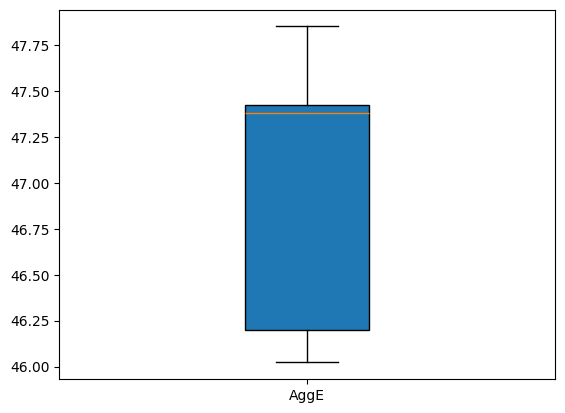

In [86]:
# AggPE
df_compare_aggpe = pd.concat([df_dm2.loc[:, 'latency [ms]'].rename('DM'),
                        df_bev.loc[:, 'latency [ms]'].rename('BEV')], axis=1)
df_compare_aggpe['diff'] = df_compare_aggpe['BEV'] - df_compare_aggpe['DM']

fig, ax = plt.subplots()
ax.boxplot(df_compare_aggpe['diff'].to_numpy(), positions=[2], widths=[1],
           patch_artist=True, showmeans=False, showfliers=False, labels=['AggE'])
ax.set(xlim=(0, 4))
plt.show()

In [87]:
df_compare_aggpe = clean_latency_data(df_compare_aggpe, col='diff', factor=2)


In [88]:
# crop sample to [mean - 2*sd, mean + 2*sd]
df_compare_fpe = clean_latency_data(df_compare_fpe, col='diff', factor=2)
df_compare_arpe = clean_latency_data(df_compare_arpe, col='diff', factor=2)
df_compare_aggpe = clean_latency_data(df_compare_aggpe, col='diff', factor=2)

# scale to ms
df_compare_fpe['diff'] /= 1000
df_compare_arpe['diff'] /= 1000

res_table = [['Span', '[{},{}]'.format(str(df_compare_fpe.min()['diff']), str(df_compare_fpe.max()['diff'])), 
              '[{},{}]'.format(str(df_compare_arpe.min()['diff']), str(df_compare_arpe.max()['diff'])),
              '[{},{}]'.format(str(df_compare_aggpe.min()['diff']), str(df_compare_aggpe.max()['diff']))],
             ['Mean', df_compare_fpe.mean()['diff'], df_compare_arpe.mean()['diff'], df_compare_aggpe.mean()['diff']],
             ['Median', df_compare_fpe.median()['diff'], df_compare_arpe.median()['diff'], df_compare_aggpe.median()['diff']]
             ]


df_res = pd.DataFrame(res_table, columns=['', 'FPE', 'ArPE', 'AggPE'])
print(df_res)


                      FPE          ArPE                        AggPE
0    Span  [-0.221,0.216]  [-0.06,0.07]  [46.022,47.852000000000004]
1    Mean       -0.002598      0.003724                    47.000196
2  Median             0.0         0.004                      47.3875


## 2. Point Rate

In [89]:
# Conversion
total_pkt = []
for p in ['conversion', 'roi', 'dm1', 'dm2', 'bev', 'max']:
    log = [p]
    for t in ['8Mbps', '128Mbps']:
        df = load_packet_data(throughput=t, pipeline=p, max_frame=LAST_FRAME-1)
        packet_count = len(df)
        log.append(packet_count)
    total_pkt.append(log)

df_res = pd.DataFrame(total_pkt, columns=['pipeline', '8Mbps', '128Mbps'])
df_res['difference'] = df_res.apply(lambda row: int(row['8Mbps']) - int(row['128Mbps']), axis=1)

print(df_res.head(10))

AssertionError: invalid file path: ./data\conversion\8Mbps\palicus.csv